In [45]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

In [59]:
data0 = pd.read_csv("D:\phish.csv")
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


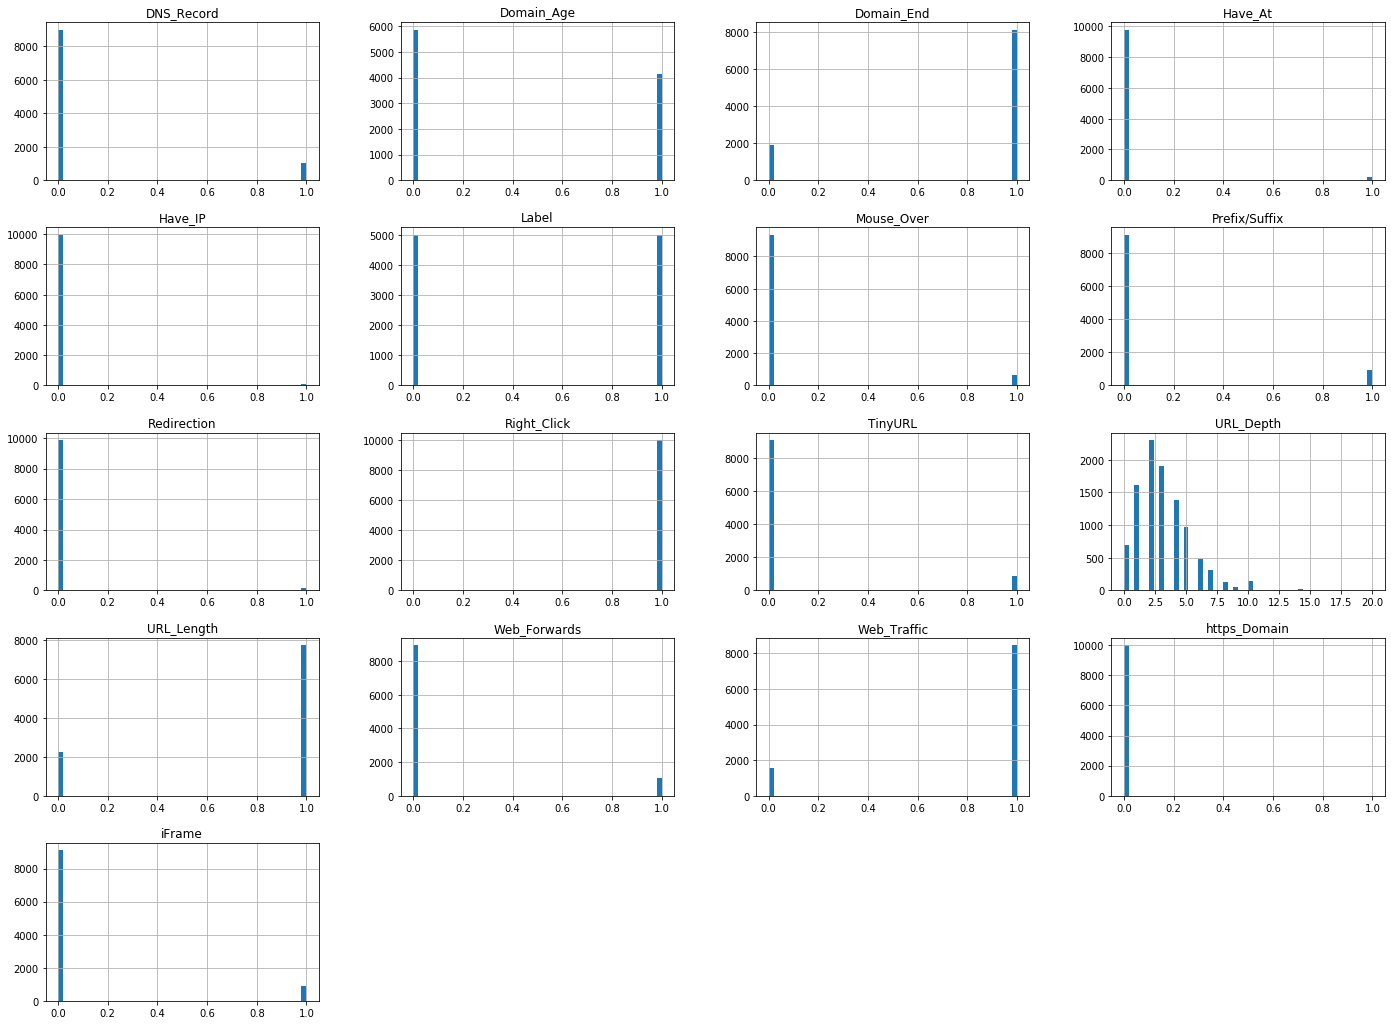

In [60]:
data0.hist(bins = 50,figsize = (24,18))
plt.show()

In [61]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [62]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [63]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [64]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
1,0,0,0,3,0,0,0,0,0,1,1,1,0,0,1,0,1
2,0,0,0,3,0,0,0,0,0,1,1,1,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0


In [65]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [66]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_train.shape, X_test.shape


((9000, 16), (1000, 16))

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [69]:
evaluate(lr,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[4269  237]
 [1562 2932]]
ACCURACY SCORE:
0.8001
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.732121     0.925213  0.800111     0.828667      0.828538
recall        0.947403     0.652425  0.800111     0.799914      0.800111
f1-score      0.825965     0.765236  0.800111     0.795600      0.795641
support    4506.000000  4494.000000  0.800111  9000.000000   9000.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[476  18]
 [164 342]]
ACCURACY SCORE:
0.8180
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.743750    0.950000     0.818     0.846875      0.848112
recall       0.963563    0.675889     0.818     0.819726      0.818000
f1-score     0.839506    0.789838     0.818     0.814672      0.814374
support    494.000000  506.000000     0.818  1000.000000   1000.000000


In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
evaluate(knn,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3657  849]
 [ 710 3784]]
ACCURACY SCORE:
0.8268
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.837417     0.816749  0.826778     0.827083      0.827097
recall        0.811585     0.842012  0.826778     0.826798      0.826778
f1-score      0.824298     0.829188  0.826778     0.826743      0.826740
support    4506.000000  4494.000000  0.826778  9000.000000   9000.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[402  92]
 [ 88 418]]
ACCURACY SCORE:
0.8200
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.820408    0.819608      0.82     0.820008      0.820003
recall       0.813765    0.826087      0.82     0.819926      0.820000
f1-score     0.817073    0.822835      0.82     0.819954      0.819988
support    494.000000  506.000000      0.82  1000.000000   1000.000000
